In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [2]:
titanic_data=pd.read_csv('train.csv')


# Q1

In [3]:


titanic_data.tail(6)



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.125,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.450,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.750,NaN,Q


The last six passenger's informations in Titanic dataset.

# Q2

In [4]:

titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

List of all attributes(column titles)

# Q3 

In [5]:

titanic_data.shape


(891, 12)

Number of rows and columns

In [6]:


size=titanic_data.size
print("Size = {}".format(size))
dimension=titanic_data.ndim
print("Dimension={}".format(dimension))


Size = 10692
Dimension=2


Size and dimension of titanic dataset.

# Q4

In [7]:


titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

List of missing values. Cabin column has 687 missing values. 

# Q5

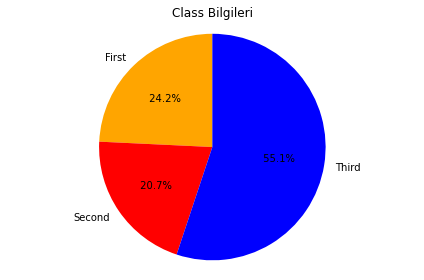

In [8]:

First = (titanic_data.Pclass==1).sum()
Second = (titanic_data.Pclass==2).sum()
Third = (titanic_data.Pclass==3).sum()

proportions=[First,Second,Third]

plt.pie(
    
    proportions,
    
    labels=['First','Second','Third'],
    
    shadow=False,
    
    colors=['orange','red','blue'],
    
    startangle = 90,
    
    autopct= ' %1.1f%% ' 
   
)

plt.axis('equal')
plt.title("Class Bilgileri")

plt.tight_layout()
plt.show()

A pie chart which shows the percentage of the passengers that were traveling
in the 1st, 2nd and 3rd classes. As is seen 3rd class has more passengers from other classes.

# Q6

Text(0.5, 1.0, '1 = Survived 0 = Not Survived')

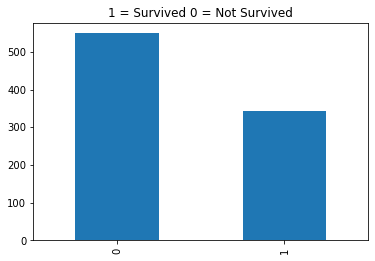

In [9]:

titanic_data.Survived.value_counts().plot(kind='bar')
plt.title("1 = Survived 0 = Not Survived")



A bar chart that shows the number of passengers who survived and who did not survive. Looking at the bar chart, we can say
most of the passengers died.

# Q7

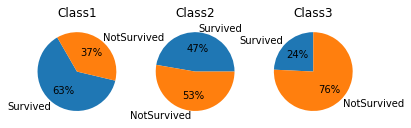

In [10]:

pc1 = titanic_data[titanic_data["Pclass"]==1]
pc2 = titanic_data[titanic_data["Pclass"]==2]
pc3 = titanic_data[titanic_data["Pclass"]==3]

t1_1 = pc1[pc1["Survived"]==1]["PassengerId"].size
t1_0 = pc1[pc1["Survived"]==0]["PassengerId"].size
t2_1 = pc2[pc2["Survived"]==1]["PassengerId"].size
t2_0 = pc2[pc2["Survived"]==0]["PassengerId"].size
t3_1 = pc3[pc3["Survived"]==1]["PassengerId"].size
t3_0 = pc3[pc3["Survived"]==0]["PassengerId"].size


t1_0 = t1_0/(t1_1+t1_0)*100
t1_1= 100-t1_0

t2_0 = t2_0/(t2_1+t2_0)*100
t2_1=100-t2_0
t3_0 = t3_0/(t3_1+t3_0)*100
t3_1=100-t3_0

fig1,(ax1,ax2,ax3)=plt.subplots(1,3)
labels=["Survived","NotSurvived"]
ax1.pie([t1_1,t1_0],labels=labels,autopct="%.0f%%",startangle = 120)
ax1.set_title("Class1")
ax2.pie([t2_1,t2_0],labels=labels,autopct="%.0f%%")
ax2.set_title("Class2")
ax3.pie([t3_1,t3_0],labels=labels,autopct="%.0f%%",startangle=90)
ax3.set_title("Class3")
plt.show()



A bar chart that shows the percentage of passengers for each ticket class who survived and not survive. As can be seen, most of the passengers in the first class survived.On the other hand, most of the passengers in the third class died. 
I think this is because people with first class tickets pay more.




# Q8

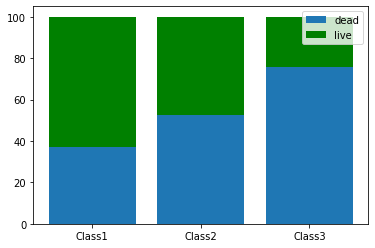

In [11]:


class3=titanic_data[titanic_data["Pclass"]==3]
class2=titanic_data[titanic_data["Pclass"]==2]
class1=titanic_data[titanic_data["Pclass"]==1]

three1=class3[class3["Survived"]==1]["PassengerId"].size
three0=class3[class3["Survived"]==0]["PassengerId"].size
two1=class2[class2["Survived"]==1]["PassengerId"].size
two0=class2[class2["Survived"]==0]["PassengerId"].size
one1=class1[class1["Survived"]==1]["PassengerId"].size
one0=class1[class1["Survived"]==0]["PassengerId"].size

one0=one0/(one0+one1)*100
one1=100-one0
two0=two0/(two0+two1)*100
two1=100-two0
three0=three0/(three0+three1)*100
three1=100-three0

listdead=[one0,two0,three0]
listlive =[one1,two1,three1]

listclass=["Class1","Class2","Class3"]

plt.bar(listclass,listdead)
plt.bar(listclass,listlive,bottom = listdead,color="green")
plt.legend(["dead","live"])
plt.show()

 A bar chart that shows the survival rates of each ticket class. As it is seen Class1 has highest survival rate.  As explained in the previous question, those who paid more had an advantage over the others.

# Q9

In [12]:
# Cinsiyetlere göre hayatta kalma sayıları crosstable' da gösterilmiştir

pd.crosstab(titanic_data.Sex, titanic_data.Survived, margins=True)

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


A cross table showing survival numbers by age and gender. Women have the highest survival rate. Men have the lowest survival rate.

Women survival rate = 233/314 = %72.2 

Men survival rate = 109/577 = %18,89


# Q10

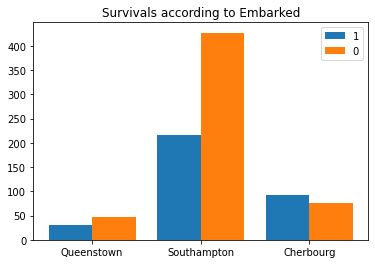

In [13]:
titanic_data2 = titanic_data.dropna(subset=["Embarked"])
s_Q = titanic_data2[(titanic_data2["Survived"]==1) &(titanic_data2["Embarked"]=="Q")]["Embarked"].count()
s_S = titanic_data2[(titanic_data2["Survived"]==1) &(titanic_data2["Embarked"]=="S")]["Embarked"].count()
s_C = titanic_data2[(titanic_data2["Survived"]==1) &(titanic_data2["Embarked"]=="C")]["Embarked"].count()

Q = titanic_data2[(titanic_data2["Embarked"]=="Q")]["Embarked"].count()
S = titanic_data2[(titanic_data2["Embarked"]=="S")]["Embarked"].count()
C = titanic_data2[(titanic_data2["Embarked"]=="C")]["Embarked"].count()

labels = ["Q","S","C"]
survived = [s_Q,s_S,s_C]
dead =[ (Q-s_Q), (S-s_S), (C-s_C)]

x = np.arange(3)+1
fig,ax = plt.subplots()
rects1 = ax.bar(x-0.2, survived ,0.4 ,label='1')
rects2 = ax.bar(x+0.2, dead     ,0.4 ,label='0')

plt.xticks(x,['Queenstown','Southampton','Cherbourg'])
ax.set_title('Survivals according to Embarked')
plt.legend()
plt.show()

A bar chart that shows the number of passengers who survived and didn’t 
survive for each Port of Embarkation.Most of the passengers embarked from Southampton port. Most passengers embarked from Southampton could have 3rd tickets. Because most of them died.

# Q11

In [14]:
 
group=[]

titanic_data1=titanic_data.dropna(subset=["Age"])
for i in range(titanic_data1["Age"].size):
    if(list(titanic_data1["Age"])[i]<=18):
        group.append("child")
    elif((list(titanic_data1["Age"])[i]>18)&(list(titanic_data1["Age"])[i]<60)):
        group.append("adult")
    else:
        group.append("old")

titanic_data2=titanic_data1.loc[:,["Sex","Survived"]]
titanic_data2["group"]=group


pd.crosstab([titanic_data2.Sex,titanic_data2.Survived],titanic_data2.group,margins=True)           



group            adult  child  old  All
Sex    Survived                        
female 0            42     22    0   64
       1           147     46    4  197
male   0           294     47   19  360
       1            66     24    3   93
All                549    139   26  714

Similar to Q9 but age group information is added. Child have highest survival rate. Because women and children got on the lifeboats first.

Child survival rate = 70 / 139 = 50,35

# Q12

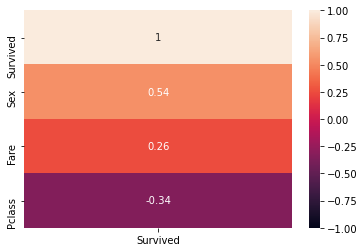

In [15]:
titanic_data2 = titanic_data.dropna(subset=["Age"])
titanic_data2=titanic_data.drop(["Parch","Age","PassengerId","SibSp"],axis=1)

titanic_data2['Sex'] = titanic_data2['Sex'].replace(regex='female', value=1)
titanic_data2['Sex'] = titanic_data2['Sex'].replace(regex='male', value=0)
heatmap =sns.heatmap(titanic_data2.corr()[['Survived']].sort_values(by='Survived',ascending=False), vmin=-1, vmax=1, annot=True)

The most strongest common attributes of surviving passengers. 

# Q13

In [16]:
temp = list(titanic_data.Name)
temp = [i.replace("(","").replace(")","").replace("'","").split() for i in temp]
temp2 =[]

for i in temp:
  for j in i:
        temp2.append(j)
temp3 = pd.Series(temp2)
temp3.value_counts().head(1)

Mr.    517
dtype: int64

It is most commonly used title. There are 517 people with the title of Mr.

# Q14

In [17]:

temp=titanic_data["Surname"] = titanic_data["Name"].str.split(",").str.get(1)
temp.str.split(".").str.get(0).value_counts()

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Col               2
 Major             2
 Mlle              2
 the Countess      1
 Sir               1
 Mme               1
 Ms                1
 Capt              1
 Lady              1
 Jonkheer          1
 Don               1
Name: Name, dtype: int64

All distinct titles are used in Name column.

# Q15

In [18]:

titanic_data3 = titanic_data.dropna(subset=["Age"]) 
titanic_data3[["Age"]].mean()


Age    29.699118
dtype: float64

The average age of the passengers.

# Q16

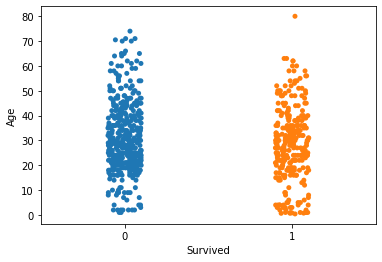

In [19]:
strip = sns.stripplot(x="Survived",y="Age",data=titanic_data)

Strip chart showing the age distribution of the deceased and the survivors.


# Q17

In [20]:

oldest = titanic_data[titanic_data["Survived"]==1]
oldest["Age"].max()

80.0

The oldest person's age who survivor in passengers.

# Q18-Q19

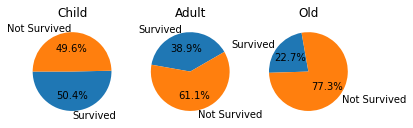

In [21]:
agegroup=[]

titanic_data1=titanic_data.dropna(subset=["Age"])
for i in range(titanic_data1["Age"].size):
    if(list(titanic_data1["Age"])[i]<19):
        agegroup.append("child")
    elif((list(titanic_data1["Age"])[i]>18)&(list(titanic_data1["Age"])[i]<61)):
        agegroup.append("adult")
    else:
        agegroup.append("old")

titanic_data2 = titanic_data1.loc[:,["Sex","Survived"]]
titanic_data2["agegroup"]=agegroup

child1 = titanic_data2[(titanic_data2["agegroup"]=="child")&(titanic_data2["Survived"]==1)]
child2 = child1["Sex"].size

c1 = titanic_data2[(titanic_data2["agegroup"]=="child")&(titanic_data2["Survived"]==0)]
c2 = c1["Sex"].size

adult1 = titanic_data2[(titanic_data2["agegroup"]=="adult")&(titanic_data2["Survived"]==1)]
adult2 = adult1["Sex"].size

a1 = titanic_data2[(titanic_data2["agegroup"]=="adult")&(titanic_data2["Survived"]==0)]
a2 = a1["Sex"].size

old1 = titanic_data2[(titanic_data2["agegroup"]=="old")&(titanic_data2["Survived"]==1)]
old2 = old1["Sex"].size

o1 = titanic_data2[(titanic_data2["agegroup"]=="old")&(titanic_data2["Survived"]==0)]
o2 = o1["Sex"].size


proportions=[child1,c1]


fig1,(ax1,ax2,ax3)=plt.subplots(1,3)
labels=["Survived","Not Survived"]
ax1.pie([child2,c2],labels=labels,autopct="%1.1f%%",startangle = 180)
ax1.set_title("Child")
ax2.pie([adult2,a2],labels=labels,autopct="%1.1f%%",startangle = 30)
ax2.set_title("Adult")

ax3.pie([old2,o2],labels=labels,autopct="%1.1f%%",startangle = 100)
ax3.set_title("Old")



plt.show()

 


There are 3 pie charts in this answer.Child, adult and old. Survival rates are shown in each pie chart. As can be seen, children have the highest survival rate. On the other hand, the majority of elderly people died. 
This is because first priority was given to women and children.


# Q20

In [22]:
# Yolcular arasında en fazla kardeşe sahip olan kişinin 8 kardeşi vardır.

temp=titanic_data["SibSp"].max();
print(temp);

8


The person with the most siblings among the passengers has 8 siblings.
